<a href="https://colab.research.google.com/github/ChristianKouris/vignere-decrypter/blob/main/vigenere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import matplotlib.pyplot as plt
import numpy as np
#guess the length of the key
l = 7
#example encrypted text
text = 'PZAXGYJAKNTVMJLIVXXBKKEXYIFAJFAHRCYJAVFYHEJMCBSHDHHNMVUJZRXKQYZVGALSWE\
LFHFSMPCUBBFFUIKNGEVHPZPNFCMBUCHYMZPSRMEFYVYVNRCYHFRHRMWUPOTGCHPFJMMHC\
IDXTHYYVYVXVWAHEBNGBEAUBBQJKYFJGXZKYADKKFKIMUXGIJVYHTRXKBDWTXCKUMULIWQ\
YUCRXIDHHNLXLKUSNGGLUWFRHRMPHZMTVXOATNWIPASAYFIHPHZMKSVQZFJWSJPPAWHJMP\
YAWZIHYYKYMMIJPEJDISPVAUMSMAJGAXGIITQAVIUJKFATHYOHRNZYUNKBABZUPLUWYSLI\
HFRHRJNVYXMIZNLQNQTLAZERHRUJKMBLSWEHFRHRUJKECKIHCATNGGSXLDBXGONPFHMLYZ\
LBJKXGAUFRLSHPOQOKSHPSUWXWIBATNYMADAMPTMHOAOHUILYYUVXEHZDQTGSQBPDBMLUJ\
KFQXHUIHSNMLUPJMWUIWWBENWFSPOABXABKLJYESCPCGUGILWIXNTRXEUENVYLAZKBMIGO\
DQBNTJKYFJGHYJJADKEAAATNNWYKMENVYLAUQCPSLGZFXIVYRLZCVCVAYFQKIUPZFXHYLY\
YUCBGUHUMCBSHWSUWYVUOADDVXONLADKMHPLXUXGNQHXYKSJAYFHTRXKBDMTXUOVMBMSJN\
VYXMIIQYAEXVUHSEJYINUHYNKMWWUORMMTAUELTVYZLQYECUXVGCIVCRHOHTRXNPSQMPSO\
VYJGCWKTBJGMYOOMEXFYAUDNLTIJKUWZXIWTMADINZLYJGHZKYBAHHOYAEJGHMAYHRVIMP\
OMCIVIPLOCMLYLYUETGSWUPBXGONPFHHJNDLUAVYMPVYNKWNDPEQTWAAUQATXYZWABBXCR\
LUWGSPWAUXGXBWATJLFYAUOANGCWSFXMLYZPSRMEFAJAWHQSSLFXHGUNLMKHYNPOQBXMGL\
VDCTRNLYUWVMJHLERGHYAKUCBWIQYAKEMAWAUXGXIQWTXEHWECUUEMVAYFRXWCJJXDWMHC\
ATNKMADAFXIVCRHOHPIBWCQJEAUUZDNLTYYAQMMLYBBZMTQYJAMUKMADAAOIIILSQCHIHC\
HSNBRJNPHJMIWKTYDGMWWAUXGWLANMAWPYOZAOMLYILPRNQINAQLARIHVSHPLYPOQABXCO\
PZBMEHPTQBLEAAZFNQXMKYAUWJUOOUXGIXHLFCXVMYPFRSIHOOMEXXBAYUPAXNKJAVFYHE'

In [32]:
#using Kasiski examination to find the possible lengths of the key
patterns = []
lengths = []
divisors = []

for i in range(len(text)-l):
  if text.count(text[i:i+l]) > 1:
    patterns.append(text[i:i+l])

for i in patterns:
  if patterns.count(i) > 1:
    patterns.remove(i)

for i in patterns:
  lengths.append(text.rfind(i)-text.find(i)+l)

for i in range(min(lengths)):
  divisor = True;
  for length in lengths:
    if length%(i+1) != 0:
      divisor = False;
      break
  if divisor:
    divisors.append(i+1)
print(divisors)

[1, 7]


letter: 0


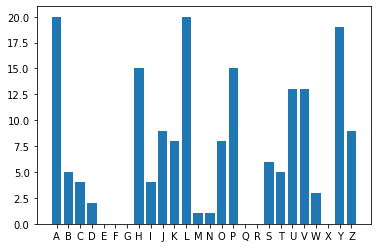

letter: 1


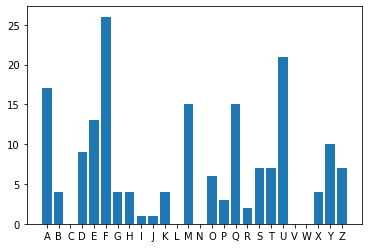

letter: 2


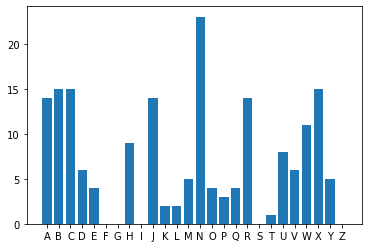

letter: 3


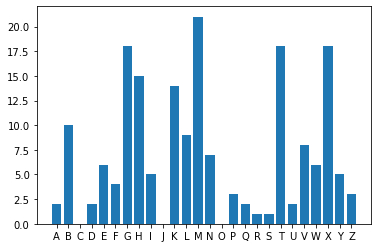

letter: 4


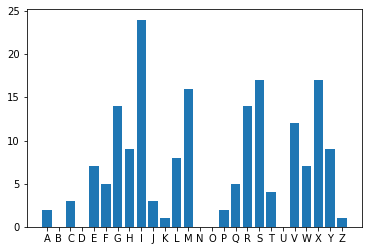

letter: 5


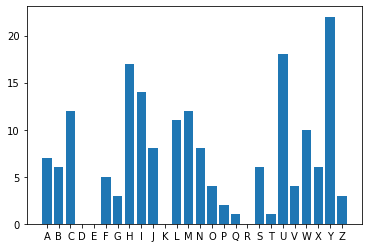

letter: 6


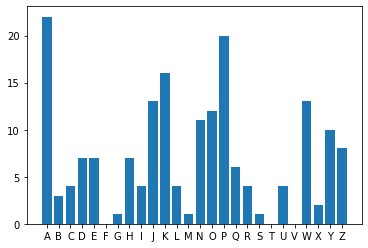

In [33]:
#use one of the common divisors as a key length
kl = divisors[-1]
#using frequency analysis for each letter of the key to determine what the key is
rows_of_kl = []
while len(text) > 0:
  rows_of_kl.append(text[:kl])
  text = text[kl:]

alphabet = []
for i in range(ord('Z')-ord('A')+1):
  alphabet.append(0);

letters = []
for i in range(kl):
  letters.append(alphabet[:])

for i in rows_of_kl:
  for j in range(len(i)):
    letters[j][ord(i[j])-ord('A')] = letters[j][ord(i[j])-ord('A')] + 1

for i in range(len(letters)):
  x = []
  y = []
  for j in range(len(letters[i])):
    x.append(chr(j+ord('A')))
    y.append(letters[i][j])
  plt.bar(x,y)
  print("letter: " + str(i))
  plt.show()



In [36]:
text = 'PZAXGYJAKNTVMJLIVXXBKKEXYIFAJFAHRCYJAVFYHEJMCBSHDHHNMVUJZRXKQYZVGALSWE\
LFHFSMPCUBBFFUIKNGEVHPZPNFCMBUCHYMZPSRMEFYVYVNRCYHFRHRMWUPOTGCHPFJMMHC\
IDXTHYYVYVXVWAHEBNGBEAUBBQJKYFJGXZKYADKKFKIMUXGIJVYHTRXKBDWTXCKUMULIWQ\
YUCRXIDHHNLXLKUSNGGLUWFRHRMPHZMTVXOATNWIPASAYFIHPHZMKSVQZFJWSJPPAWHJMP\
YAWZIHYYKYMMIJPEJDISPVAUMSMAJGAXGIITQAVIUJKFATHYOHRNZYUNKBABZUPLUWYSLI\
HFRHRJNVYXMIZNLQNQTLAZERHRUJKMBLSWEHFRHRUJKECKIHCATNGGSXLDBXGONPFHMLYZ\
LBJKXGAUFRLSHPOQOKSHPSUWXWIBATNYMADAMPTMHOAOHUILYYUVXEHZDQTGSQBPDBMLUJ\
KFQXHUIHSNMLUPJMWUIWWBENWFSPOABXABKLJYESCPCGUGILWIXNTRXEUENVYLAZKBMIGO\
DQBNTJKYFJGHYJJADKEAAATNNWYKMENVYLAUQCPSLGZFXIVYRLZCVCVAYFQKIUPZFXHYLY\
YUCBGUHUMCBSHWSUWYVUOADDVXONLADKMHPLXUXGNQHXYKSJAYFHTRXKBDMTXUOVMBMSJN\
VYXMIIQYAEXVUHSEJYINUHYNKMWWUORMMTAUELTVYZLQYECUXVGCIVCRHOHTRXNPSQMPSO\
VYJGCWKTBJGMYOOMEXFYAUDNLTIJKUWZXIWTMADINZLYJGHZKYBAHHOYAEJGHMAYHRVIMP\
OMCIVIPLOCMLYLYUETGSWUPBXGONPFHHJNDLUAVYMPVYNKWNDPEQTWAAUQATXYZWABBXCR\
LUWGSPWAUXGXBWATJLFYAUOANGCWSFXMLYZPSRMEFAJAWHQSSLFXHGUNLMKHYNPOQBXMGL\
VDCTRNLYUWVMJHLERGHYAKUCBWIQYAKEMAWAUXGXIQWTXEHWECUUEMVAYFRXWCJJXDWMHC\
ATNKMADAFXIVCRHOHPIBWCQJEAUUZDNLTYYAQMMLYBBZMTQYJAMUKMADAAOIIILSQCHIHC\
HSNBRJNPHJMIWKTYDGMWWAUXGWLANMAWPYOZAOMLYILPRNQINAQLARIHVSHPLYPOQABXCO\
PZBMEHPTQBLEAAZFNQXMKYAUWJUOOUXGIXHLFCXVMYPFRSIHOOMEXXBAYUPAXNKJAVFYHE'

key = 'HMJTEUW'

def vigDecrypt(ciphertext, key):
    decrypted = ''
    for i, ch in enumerate(ciphertext):
        decrypted += unshiftLetter(ch, key[i % len(key)])
    return decrypted

def unshiftLetter(letter, keyLetter):
    letter = ord(letter) - ord("A")
    keyLetter = ord(keyLetter) - ord("A")
    new = (letter - keyLetter) % 26
    return chr(new + ord("A"))

print(vigDecrypt(text, key))

INRECENTYEARSNEWMETHODSOFELECTRONICCOMMUNICATIONHAVETRANSFORMEDOURSOCIETYMOSTVISIBLYBYENABLINGUBIQUITOUSDIGITALCOMMUNICATIONSANDFACILITATINGBROADECOMMERCEASSUCHITISIMPORTANTFOROURGLOBALECONOMYANDOURNATIONALSECURITYTOHAVESTRONGENCRYPTIONSTANDARDSTHEDEVELOPMENTANDROBUSTADOPTIONOFSTRONGENCRYPTIONISAKEYTOOLTOSECURECOMMERCEANDTRADESAFEGUARDPRIVATEINFORMATIONPROMOTEFREEEXPRESSIONANDASSOCIATIONANDSTRENGTHENCYBERSECURITYTHEDEPARTMENTISONTHEFRONTLINESOFTHEFIGHTAGAINSTCYBERCRIMEANDWEKNOWFIRSTHANDTHEDAMAGETHATCANBECAUSEDBYTHOSEWHOEXPLOITVULNERABLEANDINSECURESYSTEMSWESUPPORTANDENCOURAGETHEUSEOFSECURENETWORKSTOPREVENTCYBERTHREATSTOOURCRITICALNATIONALINFRASTRUCTUREOURINTELLECTUALPROPERTYANDOURDATASOASTOPROMOTEOUROVERALLSAFETYAMERICANCITIZENSCAREDEEPLYABOUTPRIVACYANDRIGHTLYSOMANYCOMPANIESHAVEBEENRESPONDINGTOAMARKETDEMANDFORPRODUCTSANDSERVICESTHATPROTECTTHEPRIVACYANDSECURITYOFTHEIRCUSTOMERSTHISHASGENERATEDPOSITIVEINNOVATIONTHATHASBEENCRUCIALTOTHEDIGITALECONOMYWETOOCAREABOUTTHESEIMPORTANTPRINCIPLESINDE